In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import stockemb_benchmark as stemb

# Load price dataset

In [32]:
stocks = ['AAPL', 'GOOG', 'GOOGL', 'C', 'BA', 'MS', 'MSFT', 'GS', 'BAC', 'NDAQ',
       'T', 'WFC', 'AMZN', 'MCO', 'BLK', 'CVX', 'INTC', 'PFE', 'ORCL', 'HPQ',
       'SBUX', 'CSCO', 'NFLX', 'MRK', 'CME', 'BBY', 'MET', 'EBAY', 'CMCSA',
       'MA', 'CAT', 'FDX', 'QCOM', 'NKE', 'MCD', 'HD', 'DISCA', 'DISCK', 'PEP',
       'STT', 'AMGN', 'HAL', 'ALL', 'MMM', 'AXP', 'COP', 'MDT', 'CCL', 'XOM',
       'RTN', 'TXN', 'EA', 'USB', 'DE', 'UTX', 'ADBE', 'HES', 'M', 'XRX',
       'BSX', 'APA', 'BIIB', 'ETFC', 'EXC', 'GE', 'LEN', 'WHR', 'MO', 'KMI',
       'TIF', 'AVGO', 'GIS', 'SLB', 'ILMN', 'ETN', 'ETR', 'AES', 'NVDA', 'JNJ',
       'LMT', 'AFL', 'AMAT', 'DUK', 'COTY', 'HUM', 'GD', 'HAS', 'IVZ', 'DISH',
       'K', 'AON', 'AGN', 'JPM', 'WYNN', 'EXPE', 'PLD', 'L', 'JWN', 'ACN',
       'HCA']
tstart, tend = '2006', '2013'

# read price data
price = pd.read_csv('data/snp500_individuals_adjclose.csv', index_col=0, parse_dates=True)
price = price[stocks]
# price = price[tstart:tend].dropna(axis=1)
# stocks = price.columns
snp500 = pd.read_csv('data/snp500.csv', index_col=0, parse_dates=True)['Adj Close']

# compute log-return history for the stocks
snp500_ret = np.log(snp500).diff().iloc[1:]
snp500_ret = snp500_ret.loc[tstart:tend]
rets = np.log(price).diff().iloc[1:]              # here I used log-return, but it is OK to use (price_{t+1} / price_t) - 1
rets = rets.loc[tstart:tend]
rets = rets.dropna(axis=1)
rets

/home/duxin/.pyenv/versions/3.6.5/envs/finnews/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


,AAPL,GOOG,GOOGL,C,BA,MS,MSFT,GS,BAC,NDAQ,...,K,AON,AGN,JPM,WYNN,EXPE,PLD,L,JWN,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,0.039012,0.047933,0.047934,0.015539,0.002843,0.027294,0.026044,0.009042,0.019952,0.030237,...,0.011502,0.035523,0.013140,0.012519,-0.016545,0.001668,0.011727,0.019627,0.008520,0.014784
2006-01-04,0.002939,0.022739,0.022739,-0.018635,0.010310,0.000686,0.004832,-0.013909,-0.010677,0.018580,...,0.008655,0.003484,-0.000911,-0.005788,-0.001855,0.010363,-0.003020,0.008544,-0.001327,0.005446
2006-01-05,-0.007901,0.013386,0.013386,0.004949,-0.011873,0.002738,0.000741,-0.000393,0.001288,0.000271,...,0.003622,-0.007519,0.003337,0.003024,-0.005960,-0.010363,0.000000,0.003887,0.051731,0.007440
2006-01-06,0.025486,0.031456,0.031456,0.000000,-0.014033,0.001025,-0.002968,0.014069,-0.001502,0.075306,...,0.003158,-0.004051,0.012041,0.007021,0.009482,0.000417,0.009432,0.008641,-0.004295,0.048341
2006-01-09,-0.003282,0.002659,0.002659,-0.004742,-0.008398,0.010530,-0.001860,0.011959,0.000644,-0.010344,...,0.004719,0.009695,0.003882,0.016112,0.046108,0.016932,0.001597,-0.001215,0.015076,-0.002893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-24,-0.004254,-0.002928,-0.002928,0.000381,0.003148,-0.003219,0.012483,-0.001758,0.000637,0.003766,...,-0.001492,0.011305,-0.006408,0.000172,0.021903,-0.002624,-0.000541,0.004803,0.000975,-0.002947
2013-12-26,-0.006663,0.005042,0.005042,-0.001527,0.010469,0.002898,0.009661,0.001645,-0.003190,0.001752,...,0.007770,-0.001796,0.004417,-0.000859,0.009414,0.007707,0.004319,0.000625,0.000162,0.010278
2013-12-27,-0.006780,0.000841,0.000841,-0.001721,-0.009958,-0.001287,-0.004014,-0.000567,0.001277,-0.001502,...,0.004273,-0.000719,-0.002963,-0.001031,0.001098,-0.003919,0.001615,-0.007524,-0.003089,0.004373


# Benchmark the classical Mean Variance Minimization model

In [33]:
mu_factory = stemb.Average()
sigma_factory = stemb.Covariance()
portfolio_opt = stemb.OptRisk(target_return=0.20 / 252)      # target *daily* return

sim = stemb.Simulator(mu_factory=mu_factory, sigma_factory=sigma_factory, opt=portfolio_opt)

In [34]:
# we backtest the portfolio from year 2010
portfolio = sim.simulate(rets.loc['2010':], stockembs=None)
portfolio

<Portfolio(NFLX=0.02602, BIIB=0.02313, AGN=0.02082, WYNN=0.02074, ILMN=0.01864, SBUX=0.01861, M=0.01787, CMCSA=0.01776, HD=0.01708, LEN=0.01703, DISH=0.01686, MCO=0.01683, AMZN=0.01629, DISCA=0.01623, NKE=0.01617, AAPL=0.01546, BA=0.01544, ETN=0.01542, MO=0.01418, HUM=0.014, AXP=0.01362, LMT=0.01351, EBAY=0.01339, TIF=0.01332, AON=0.0133, COP=0.01271, ACN=0.0125, AMGN=0.01234, WHR=0.01229, GE=0.01227, NDAQ=0.01197, RTN=0.01172, ALL=0.01165, PFE=0.01144, HAS=0.01128, USB=0.01117, EXPE=0.01116, MMM=0.01083, CVX=0.01069, TXN=0.01067, DE=0.01053, GOOG=0.01041, GOOGL=0.01041, WFC=0.01038, UTX=0.01035, MCD=0.0102, JWN=0.01018, STT=0.01014, AFL=0.01005, FDX=0.01004, HAL=0.00993, CAT=0.00987, QCOM=0.00979, IVZ=0.0095, MET=0.00931, XOM=0.00928, PLD=0.00928, JNJ=0.00927, GIS=0.0092, MRK=0.00914, ADBE=0.0091, ORCL=0.00903, T=0.00879, PEP=0.00867, GD=0.00865, C=0.00856, BLK=0.00829, JPM=0.00825, DUK=0.00824, XRX=0.00793, INTC=0.00786, SLB=0.00781, MDT=0.00771, CCL=0.00739, AMAT=0.00733, HES=0.0073

In [35]:
gain = stemb.Gain()(portfolio)
sharpe_ratio = stemb.SharpeRatio()(portfolio, riskfree_rate=0.00)
information_ratio = stemb.InformationRatio()(portfolio, reference=snp500_ret)
pareto_alpha = stemb.ParetoAlpha()(portfolio, whichtail='negative')
print(f'Gain                               = {gain*100:.3g}%')
print(f'Sharpe ratio (risk-free rate=0%)   = {sharpe_ratio*100:.3g}%')
print(f'Information ratio (against snp500) = {information_ratio*100:.3g}%')
print(f"Pareto's alpha (at negative tail)  = {pareto_alpha:.3g}")

Calculating best minimal value for power law fit
Gain                               = 79.8%
Sharpe ratio (risk-free rate=0%)   = 107%
Information ratio (against snp500) = 206%
Pareto's alpha (at negative tail)  = 2.65


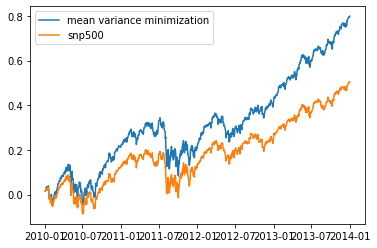

In [36]:
plt.plot(portfolio.returns.cumsum(), label='mean variance minimization')
plt.plot(snp500_ret.loc[portfolio.returns.index].cumsum(), label='snp500')
plt.legend()

# Benchmark the stock embedding method

In [37]:
mu_factory = stemb.Average()
# sigma_factory = stemb.Covariance()
sigma_factory = stemb.StockembCosine()
portfolio_opt = stemb.OptRisk(target_return=0.30 / 252)      # target *daily* return

sim = stemb.Simulator(mu_factory=mu_factory, sigma_factory=sigma_factory, opt=portfolio_opt)

In [38]:
# read stock embedding that is pretrained using data before 2009/12/31,
# such that it can be used for construction portfolios since 2010
stockembs = pd.read_csv('data/stockemb.20091231.csv')
stockembs = stockembs[stocks]

In [39]:
portfolio = sim.simulate(rets.loc['2010':], stockembs[rets.columns])
portfolio

<Portfolio(NFLX=0.22544, MO=0.12666, AAPL=0.11616, M=0.0934, EXPE=0.07312, AGN=0.07198, BIIB=0.07171, DISCA=0.06072, HAL=0.05235, ACN=0.04141, HES=0.0356, DUK=0.03147)>

In [40]:
gain = stemb.Gain()(portfolio)
sharpe_ratio = stemb.SharpeRatio()(portfolio, riskfree_rate=0.00)
information_ratio = stemb.InformationRatio()(portfolio, reference=snp500_ret)
pareto_alpha = stemb.ParetoAlpha()(portfolio, whichtail='negative')
print(f'Gain                               = {gain*100:.3g}%')
print(f'Sharpe ratio (risk-free rate=0%)   = {sharpe_ratio*100:.3g}%')
print(f'Information ratio (against snp500) = {information_ratio*100:.3g}%')
print(f"Pareto's alpha (at negative tail)  = {pareto_alpha:.3g}")

Calculating best minimal value for power law fit
Gain                               = 120%
Sharpe ratio (risk-free rate=0%)   = 135%
Information ratio (against snp500) = 112%
Pareto's alpha (at negative tail)  = 2.95


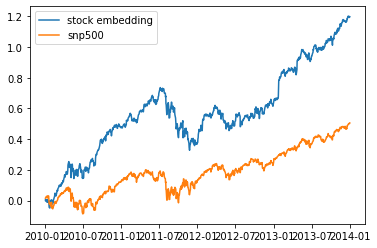

In [41]:
plt.plot(portfolio.returns.cumsum(), label='stock embedding')
plt.plot(snp500_ret.loc[portfolio.returns.index].cumsum(), label='snp500')
plt.legend()

# Benchmarking over multiple periods (with different stock embeddings)

In [42]:
mu_factory = stemb.Average()  # decays to a half after one year
sigma_factory = stemb.StockembCosine()
portfolio_opt = stemb.OptRisk(target_return=0.30 / 252)      # target *daily* return

sim = stemb.Simulator(mu_factory=mu_factory, sigma_factory=sigma_factory, opt=portfolio_opt)

In [43]:
# stock embedding acquired using data until 20091231
stemb_until2009 = pd.read_csv('data/stockemb.20091231.csv')

# stock embedding acquired using data until 20101231
stemb_until2010 = pd.read_csv('data/stockemb.20101231.csv')


# the portfolio is generated at 2009/12/31, and renewed at 2010/12/31
portfolios = sim.simulate_multistep(rets, 
                                    {
                                        '2009-12-31': stemb_until2009[rets.columns],
                                        '2010-12-31': stemb_until2010[rets.columns],
                                    })
for i, portfolio in enumerate(portfolios):
    ts = portfolio.timestamps
    print(f'------- portfolio {i} ({ts[0]} ~ {ts[-1]}) -------')
    print(portfolio)

    gain = stemb.Gain()(portfolio)
    sharpe_ratio = stemb.SharpeRatio()(portfolio, riskfree_rate=0.00)
    information_ratio = stemb.InformationRatio()(portfolio, reference=snp500_ret)
    pareto_alpha = stemb.ParetoAlpha()(portfolio, whichtail='negative')
    print(f'Gain                               = {gain*100:.3g}%')
    print(f'Sharpe ratio (risk-free rate=0%)   = {sharpe_ratio*100:.3g}%')
    print(f'Information ratio (against snp500) = {information_ratio*100:.3g}%')
    print(f"Pareto's alpha (at negative tail)  = {pareto_alpha:.3g}")

------- portfolio 0 (2010-01-04 00:00:00 ~ 2010-12-31 00:00:00) -------
<Portfolio(MO=0.15618, DUK=0.13266, AAPL=0.12175, HES=0.11217, EXPE=0.0946, M=0.09413, NFLX=0.08588, NDAQ=0.05551, ETR=0.05345, DISCA=0.0392, HAL=0.0262, ACN=0.01525, HUM=0.01301)>
Calculating best minimal value for power law fit
Gain                               = 30%
Sharpe ratio (risk-free rate=0%)   = 158%
Information ratio (against snp500) = 227%
Pareto's alpha (at negative tail)  = 3.69
------- portfolio 1 (2011-01-03 00:00:00 ~ 2013-12-31 00:00:00) -------
<Portfolio(MO=0.18975, DISH=0.15588, AGN=0.13437, NFLX=0.08715, BIIB=0.08166, AMZN=0.07879, AMGN=0.07577, M=0.06143, RTN=0.06014, EXPE=0.03637, HAL=0.02875, AAPL=0.00626, LMT=0.00368)>
Calculating best minimal value for power law fit
Gain                               = 89.8%
Sharpe ratio (risk-free rate=0%)   = 171%
Information ratio (against snp500) = 169%
Pareto's alpha (at negative tail)  = 3.1


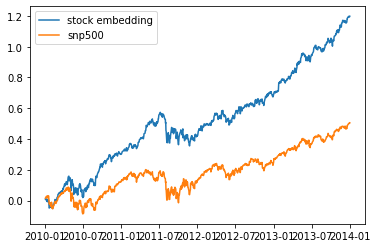

In [44]:
returns = pd.concat([p.returns for p in portfolios])
plt.plot(returns.cumsum(), label='stock embedding')
plt.plot(snp500_ret.loc[returns.index].cumsum(), label='snp500')
plt.legend()